In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAexGothic')
plt.style.use("ggplot")
import japanize_matplotlib

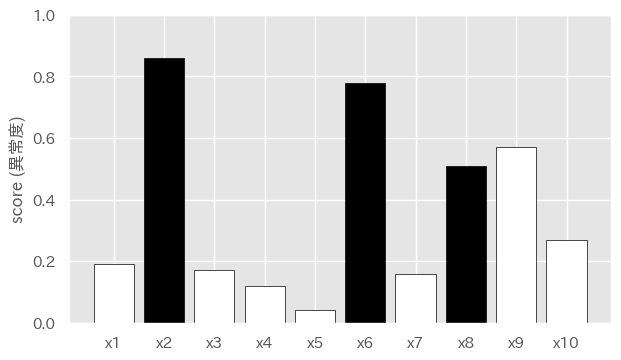

In [2]:
# ===== 実行例 4.1: データ定義 & 単独バー図 =====
score   = np.array([0.19, 0.86, 0.17, 0.12, 0.04, 0.78, 0.16, 0.51, 0.57, 0.27])
anomaly = np.array([False, True, False, False, False, True, False, True, False, False])
labels  = np.array(["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"])

# 単独バー（R: barplot(data0[,"score"], col=data0[,"anomaly"]) のイメージ）
# → Pythonでは明示的に色を割り当てる（False=white, True=black）
colors = np.where(anomaly, "black", "white")

plt.figure(figsize=(7, 4))
plt.bar(np.arange(len(score)), score, color=colors, edgecolor="black")
plt.ylim(0, 1)
plt.xticks(np.arange(len(score)), labels)
plt.ylabel("score (異常度)")
#plt.title("Scores with anomaly flag (white=normal, black=anomaly)")
plt.show()


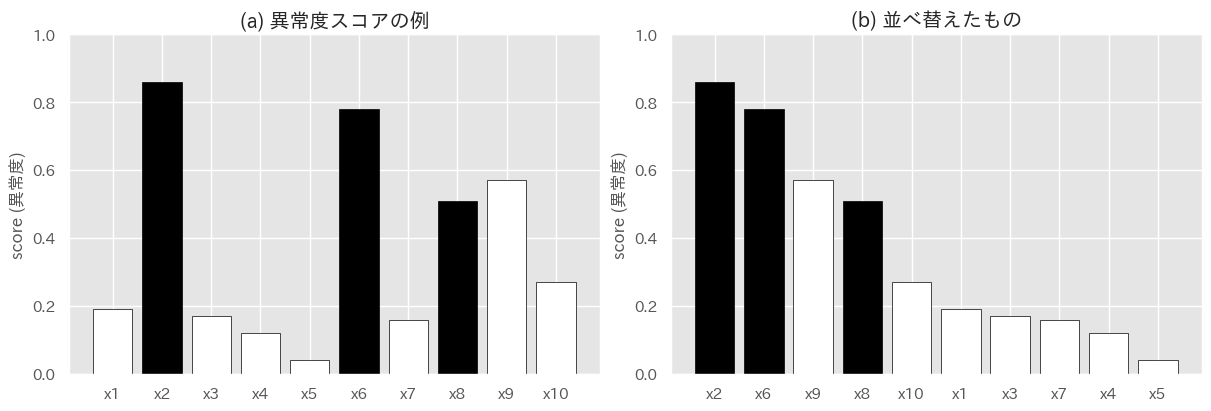

In [3]:
# ===== 実行例 4.2: 並べ替え前後のバー図（左右2枚） =====
# スコア降順で並べ替え
order = np.argsort(-score)
score_sorted   = score[order]
anomaly_sorted = anomaly[order]
labels_sorted  = labels[order]

fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# (a) 元の順
axes[0].bar(np.arange(len(score)), score, color=np.where(anomaly, "black", "white"), edgecolor="black")
axes[0].set_ylim(0, 1)
axes[0].set_xticks(np.arange(len(score)))
axes[0].set_xticklabels(labels, rotation=0)
axes[0].set_ylabel("score (異常度)")
axes[0].set_title("(a) 異常度スコアの例")

# (b) 並べ替え後
axes[1].bar(np.arange(len(score_sorted)), score_sorted,
            color=np.where(anomaly_sorted, "black", "white"), edgecolor="black")
axes[1].set_ylim(0, 1)
axes[1].set_xticks(np.arange(len(score_sorted)))
axes[1].set_xticklabels(labels_sorted, rotation=0)
axes[1].set_ylabel("score (異常度)")
axes[1].set_title("(b) 並べ替えたもの")

plt.show()

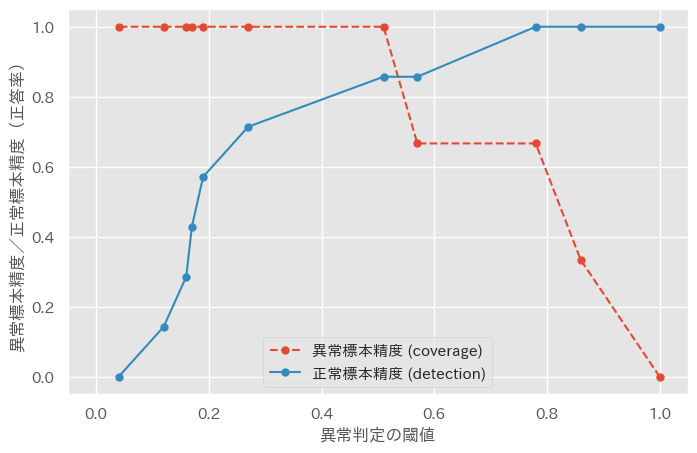

In [17]:
# ===== 実行例 4.3: coverage / detection の計算とプロット =====
n_total = len(anomaly)
n_anom  = anomaly.sum()
n_norm  = n_total - n_anom

coverage  = np.zeros(n_total, dtype=float)
detection = np.ones(n_total, dtype=float)

for i in range(1, n_total + 1):
    n_detected_anom = anomaly_sorted[:i].sum()
    n_detected_norm = (~anomaly_sorted[i:]).sum()
    coverage[i-1]  = n_detected_anom / n_anom if n_anom > 0 else 0.0
    detection[i-1] = n_detected_norm / n_norm if n_norm > 0 else 0.0

# x軸はスコアしきい値（降順スコア）
x = score_sorted

# ---- 追加：閾値 = ∞ の点（異常0件判定） ----
coverage_inf  = 0.0
detection_inf = 1.0
x_inf_plot = 1.0

# 先頭に追加
x_plot        = np.r_[x_inf_plot, x]
coverage_plot = np.r_[coverage_inf, coverage]
detection_plot= np.r_[detection_inf, detection]

plt.figure(figsize=(8, 5))
plt.plot(x_plot, coverage_plot, "--o", markersize=5, label="異常標本精度 (coverage)")
plt.plot(x_plot, detection_plot, "-o",  markersize=5, label="正常標本精度 (detection)")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel("異常判定の閾値")
plt.ylabel("異常標本精度／正常標本精度（正答率）")
plt.legend(loc="best", frameon=True)
plt.show()
